In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

sys.path.append(os.path.abspath("..\\.."))
from objects.ThreeQbCode import ThreeQbCodeCircuit

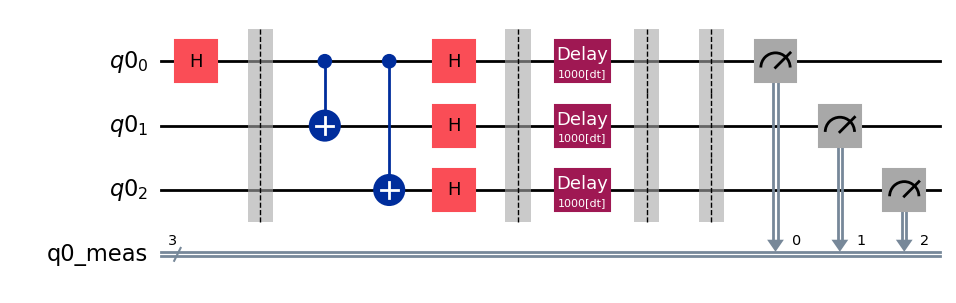

In [2]:
def load_circuit(delay, qb_len=1):
    qc = ThreeQbCodeCircuit(qb_len, type='phase_flip')

    qc.initial_state(state='+')
    qc.encode()
    # qc.x() # activar para probar el estado 1 logico
    qc.delay(delay)
    qc.measure_all(basis='Z')

    return qc

qc = load_circuit(1000, qb_len=1)
qc.draw('mpl')

In [3]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")

In [4]:
phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')

Circuit Depth: 6
Transpiled Circuit Depth: 12


In [5]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [18]:
# t_array = [t*10_000 for t in range(0, 21)]
t_array = [t*8_000 for t in range(0, 11)]
print([round(t*dt * 10**(-3),2) for t in t_array])

[0.0, 4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0]


In [21]:

circuits = []

for t in t_array:

    qc = load_circuit(t, qb_len=1)

    isa_circuit = transpile(qc.physical_circuit, backend, scheduling_method="asap", optimization_level=3
                            , initial_layout=[66, 65, 73])
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} μs")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
    # c.draw(output='mpl')

Circuit Depth: 11
Delay Duration: 0.0 μs
Total Duration: 2.8 μs

Circuit Depth: 12
Delay Duration: 4.0 μs
Total Duration: 6.8 μs

Circuit Depth: 12
Delay Duration: 8.0 μs
Total Duration: 10.8 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 12
Delay Duration: 12.0 μs
Total Duration: 14.8 μs

Circuit Depth: 12
Delay Duration: 16.0 μs
Total Duration: 18.8 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 12
Delay Duration: 20.0 μs
Total Duration: 22.8 μs

Circuit Depth: 12
Delay Duration: 24.0 μs
Total Duration: 26.8 μs

Circuit Depth: 12
Delay Duration: 28.0 μs
Total Duration: 30.8 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 12
Delay Duration: 32.0 μs
Total Duration: 34.8 μs

Circuit Depth: 12
Delay Duration: 36.0 μs
Total Duration: 38.8 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 12
Delay Duration: 40.0 μs
Total Duration: 42.8 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_41596\3267087125.py:13: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


In [22]:
def get_layout(circuit, qb_len=1):
    layout = circuit._layout.initial_layout.get_virtual_bits()
    # print(layout)
    keys = [layout[i] for i in layout]
    return keys[:qb_len]

# for c in circuits:
#     print(get_layout(c, qb_len=3))

In [23]:
def sampler_simulation(circuit, samples):

    from qiskit_aer.primitives import SamplerV2

    exact_sampler = SamplerV2()

    # Transpilamos el circuito
    pass_manager = generate_preset_pass_manager(3, AerSimulator())
    isa_circuit = pass_manager.run(circuit)

    # Corremos el circuito:
    pub = (isa_circuit, None, samples) # Notemos que tambien funciona si le pasamos el circuito qc
    job = exact_sampler.run([pub])

    result = job.result()
    pub_result = result[0]

    for lq in qc.qubits:

        state = lq.qb_measures
        print(f"  {state.name}: {pub_result.data[state.name].get_counts()}")

sampler_simulation(qc.physical_circuit, 800)

  q0_meas: {'101': 177, '110': 206, '000': 196, '011': 221}


In [25]:
sampler = SamplerV2(backend=backend)
shots = 800
# job = sampler.run(circuits, shots=shots)
# job = service.job('cy6p0ga7v8tg008fe7fg') # shots = 100, t_array = [t*10_000 for t in range(0, 21)]
job = service.job('cyheh4crta1g008va390') # shots = 800, t_array = [t*8_000 for t in range(0, 11)]

pub_result = job.result()

In [26]:
states = ['000', '111', '001', '010', '100', '011', '101', '110']
valid_states = ['000', '011', '101', '110']
results = []
for i in range(len(t_array)):
    result = pub_result[i]
    meas = result['__value__']['data']['q0_meas'].get_counts()
    # results.append({
    #     '111': meas['111'] if '111' in meas else 0,
    #     '000': meas['000'] if '000' in meas else 0,
    #     'other states': sum([meas[k] for k in meas if k not in ['000', '111']]),
    # })
    res = {}
    for k in states:
        res[k] = meas[k] if k in meas else 0
        res[k] = res[k] / shots * 100
    results.append(res)

In [27]:
delays = [round(t*dt/1000) for t in t_array]
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]/100*shots) for s in states], sep='\t ')


 delay (μs)	 000	 111	 001	 010	 100	 011	 101	 110
----------------------------------------------------------------------------------
 0		 177	 9	 4	 3	 6	 192	 196	 213
 4		 184	 9	 19	 19	 17	 157	 204	 191
 8		 177	 7	 17	 25	 14	 157	 187	 216
 12		 185	 8	 32	 34	 23	 168	 175	 175
 16		 197	 10	 49	 36	 16	 152	 160	 180
 20		 194	 14	 50	 42	 40	 173	 133	 154
 24		 177	 8	 61	 53	 36	 173	 137	 155
 28		 201	 2	 64	 62	 42	 158	 131	 140
 32		 196	 6	 75	 60	 40	 155	 135	 133
 36		 201	 4	 58	 78	 46	 145	 122	 146
 40		 194	 5	 72	 68	 47	 165	 125	 124


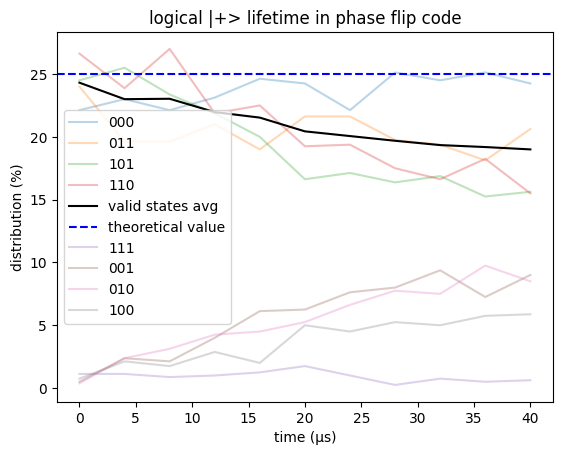

In [28]:


x = delays
y = {}
for s in valid_states:
    y[s] = [r[s] for r in results]

    plt.plot(x, y[s], label=s, alpha=0.3)

plt.plot(x, [np.mean([r[s] for s in valid_states]) for r in results], label="valid states avg", color='k')
plt.axhline(y=100/4, color='b', linestyle='--', label='theoretical value')

for s in [s for s in states if s not in valid_states]:
    y[s] = [r[s] for r in results]

    plt.plot(x, y[s], label=s, alpha=0.3)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in phase flip code')
plt.legend()

# Display the plot
plt.show()

TVD

In [29]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


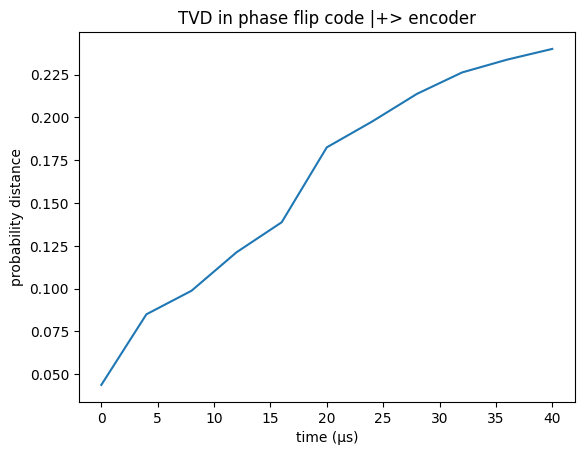

In [32]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in phase flip code |+> encoder')

# Display the plot
plt.show()

In [31]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 4.38%
